# Experiment 2.6 Voltammetry
### Determination of diffusion coefficients using cyclic voltammetry

# Abstract

The determination of diffusion coefficients of ions is important particularly for plants. Voltammetry can allow for diffusion coefficients to be determined from various derived equations. The data presented shows the expected relationship between variables and thus how to determine the respective coefficients. The diffusion coefficient for Fe3+ was found to be 

# Introduction

The effect of pH on redox reactions is important as these reactions occur readily in nature and redox potential measurements allow for characterisation of compounds at certain pH and allow for better understanding of the stability of compounds used to regulate nutrients in soils. The determination of diffusion coefficients is important, particularly in nature, as they represent the fundamental property of permeability and dictate how many molecules of nutrients or compounds can diffuse over an area per second. 

The use of the Randles-Sevich equation (which applie to cyclic voltammetry measurements) continues onwards from previous determination in lab 2.5 of the diffusion coefficient of $Fe(CN)_{6}^{3-}$ which used chronoamperometry and the Cottrell equation. The Randles-Sevich equation was derived in 1938 and the Cottrell equation in 1903. Both have been used for decades successfully and the experiment here could be used to support further understanding in the growth and development of plants – as Fe3+ ions are vital minerals for plants. Many different forms of voltammetry exist and, in this experiment, cyclic voltammetry was used.

# Method

A three electrode cell was set up as shown in figure 1 containing 200 mL of 0.02 M K3Fe(CN)6 and 1.0 M KNO3. The reference electrode was polished on alumina and washed with distilled water. The addition of KNO3 is to increase the conductivity of the solution. The electrodes were then connected to the potentiostat and computer. PSTrace 5.3 was then used under the cyclic voltammetry mode using the following potentials to produce a current vs voltage graph that enabled the determination of the reduction potential of [Fe(CN)6]3- to [Fe(CN)6] 4-. 

Equilibration	5 s

Ebegin  	    +0.5 V

Evertex 1 	    0.0 V

Evertex 2      	+0.5 V

Estep	        0.001 V

Scan rate	    0.05 V / s


The relationship between peak reduction current and sweep rate was then investigated to see if |i_p^c | ∝(v^0.5) by repeating measurements at different scan rates (10, 20, 40, 50, 100, 160 and 200 mV s-1). The measurements at each scan rate were plotted on the same graph. A plot of the peak reduction currents against sweep rates was determine whether these two variables had such a relationship.

The Randles-Sevich equation then describes the relationship seen above between the scan rate and the peak reduction currents and can thus be used to determine the diffusion coefficient of the Fe (III) species.


In [8]:
import pandas as pd
mV10 = pd.read_csv(r'10mV.csv')
mV20 = pd.read_csv(r'20mV.csv')
mV40 = pd.read_csv(r'40mV.csv')
mV50 = pd.read_csv(r'50mV.csv')
mV70 = pd.read_csv(r'70mV.csv')
mV90 = pd.read_csv(r'90mV.csv')
mV100 = pd.read_csv(r'100mV.csv') #importing all the data files at each scan rate with 'duck's shape'

import numpy as np
import matplotlib.pyplot as plt

mV10_list = mV10['µA'] #setting a list of just the micro Amp values so that a minimum of each list can be determined
print('Peak Reduction Current at 10mV is:', min(mV10_list))
mV20_list = mV20['µA']
print('Peak Reduction Current at 20mV is:', min(mV20_list))
mV40_list = mV40['µA']
print('Peak Reduction Current at 40mV is:', min(mV40_list))
mV50_list = mV50['µA']
print('Peak Reduction Current at 50mV is:', min(mV50_list))
mV70_list = mV70['µA']
print('Peak Reduction Current at 70mV is:', min(mV70_list))
mV90_list = mV90['µA']
print('Peak Reduction Current at 90mV is:', min(mV90_list))
mV100_list = mV100['µA']
print('Peak Reduction Current at 100mV is:', min(mV100_list))

mV10_min = (29.24107313 / 1000000) #standardising the peak reduction currents into Amps for use in Randles-Sevcik equation
mV20_min = (39.78497982 / 1000000)
mV40_min = 54.49770689 / 1000000
mV50_min = 59.77903605 / 1000000
mV70_min = 70.19795179 / 1000000
mV90_min = 77.07306147 / 1000000
mV100_min = 80.73561192 / 1000000

sweep_rate = np.array([0.01,0.02,0.04,0.05,0.07,0.09,0.1])
peak_reduction_currents = np.array([mV10_min,mV20_min,mV40_min,mV50_min,mV70_min,mV90_min,mV100_min])
sqrt_sweep_rate = np.sqrt(sweep_rate)
print(peak_reduction_currents)

Peak Reduction Current at 10mV is: -29.24107313
Peak Reduction Current at 20mV is: -39.78497982
Peak Reduction Current at 40mV is: -54.49770689
Peak Reduction Current at 50mV is: -59.77903605
Peak Reduction Current at 70mV is: -70.19795179
Peak Reduction Current at 90mV is: -77.07306147
Peak Reduction Current at 100mV is: -80.73561192
[2.92410731e-05 3.97849798e-05 5.44977069e-05 5.97790360e-05
 7.01979518e-05 7.70730615e-05 8.07356119e-05]


The relationship between the sweep rate and reduction peak current is thought to be:
\begin{equation} i_p ∝ w(^0.5)\end{equation}

This follows the Randles-Sevcik equation which allows for the determination of the diffusion coefficient of a species in a cyclic voltameter. The graph below will show if the relationship between the square root of the sweep rate and the reduction peak current is linear and, if it is, it can be said to fit the Randles-Sevcik model.


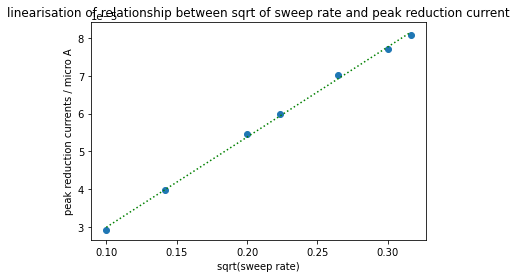

The r-squared value for this plot is: 0.9993054939725885 . This shows clearly that there is a linear relationship between the square root of the sweep rate and the peak reduction currents
The intercept for the line of best fit is: 6.097483495004049e-06
The gradient of the slope is: 0.00023846528140325266
The slope, converted from micro Amps to Amps, is: 2.384652814032527e-10


In [7]:
import scipy
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(sqrt_sweep_rate,peak_reduction_currents)

plt.plot(sqrt_sweep_rate, peak_reduction_currents, 'o')
plt.xlabel( 'sqrt(sweep rate)' )
plt.ylabel( 'peak reduction currents / micro A' )
plt.


peak_reduction_pred = intercept + slope*sqrt_sweep_rate
plt.plot(sqrt_sweep_rate,peak_reduction_pred,':', color="green", label="Fitted line")

my_title = 'linearisation of relationship between sqrt of sweep rate and peak reduction current'
plt.title( my_title )
plt.show()

print ("The r-squared value for this plot is:", rvalue, ". This shows clearly that there is a linear relationship between the square root of the sweep rate and the peak reduction currents")
print ("The intercept for the line of best fit is:", intercept)
print ("The gradient of the slope is:", slope)

slope_standardised = slope/1000000
print ("The slope, converted from micro Amps to Amps, is:", slope_standardised)

The next step, having detemined this linear relationship is then to plot a graph that will allow us to determine the diffusion coefficient of the Fe^(3+) species in this experiment using the Randles-Sevcik equation

<img style="width:200px" src='randles.svg'/>

A plot of the square-root of the scan rate on the x-axis and peak reduction current on the y-axis can thus be used to determine the diffusion coefficient.

Below shows the rearrangement of the Randles-Sevcik equation to fit a) the plot shown and b) how to use the gradient to determine the diffusion coefficient, D.

<img style="width:400px" src='equations.jpg'/>

n is the number of electrons involved in the redox of Fe (III) and Fe (II) which in this case is 1.

A is the electrode area in $cm^{2}$. The electrode diameter was measured as 1.56 mm and so the area is $1.91 * 10^{-2}$ $cm^{2}$

F is the Faraday Constant in $C mol^{-1}$

C is the concentration of the Fe (III) solution in mol $dm^{-3}$

R is the Gas Constant in $J K^{-1} mol^{-1}$

T is the temperature in K and was 298.15K in the lab on the day.

D was calculated to be $1.15 * 10^{-7}$ $cm^{2}$ $s^{-1}$

# Conclusion

The literature value for the diffusion coefficient of $Fe(CN)_{6}^{3-}$ is given as $8.96 * 10^{-6} cm^{2} s^{-1}$. The calculated value for the diffusion coefficient using chronoamperometry was determined as $9.83 * 10^{-6} cm^{2} s^{-1}$

The value determined using chronoamperometry was 10% greater than the literature value and the value using cyclic voltammetry was 16% greater than the literature value. As both literature values are outside the error range provided by the plot, it suggests the experiment overall was somewhat inaccurate and that further repeats of the experiment would be needed to be confident in the value of the diffusion coefficient. Testing of the stock solution may also be valuable as the concentration may have changed if the lid was off. 

# References


2021-22 CH20022 lab manual 2021/2022 (equations and figures)

Chemistry Department, University of Geneva

A. Molina, J. González, E. Laborda,  R. G. Compton; On the meaning of the diffusion layer thickness for slow electrode reactions; Physical Chemistry Chemical Physics; 2013, 7

Zhuang, S, Shi, X, & Lee, ES; "A Review on Non-PGM Cathode Catalysts for Polymer Electrolyte Membrane (PEM) Fuel Cell; American Society of Mechanical Engineers; 2015; 28.
